# Optimasi Layanan Transjakarta Berbasis Analisis Kepadatan, Pola Pembayaran, dan Efisiensi Koridor
---

## Pendahuluan

**Transjakarta** adalah sistem transportasi bus rapid transit (BRT) terbesar di Indonesia yang beroperasi di wilayah DKI Jakarta dan sekitarnya sejak tahun 2004. Dengan jaringan koridor yang luas dan cakupan ratusan halte, Transjakarta berperan penting sebagai tulang punggung mobilitas harian masyarakat ibu kota. Setiap hari, jutaan penumpang memanfaatkan layanan Transjakarta untuk berbagai keperluan, mulai dari perjalanan kerja, sekolah, hingga aktivitas rekreasi.

Seiring meningkatnya jumlah penumpang dan kompleksitas kebutuhan mobilitas urban, Transjakarta menghadapi tantangan dalam menjaga efisiensi layanan, mengelola lonjakan penumpang pada jam-jam sibuk (rush hour), serta mengakomodasi variasi perilaku pengguna di hari kerja dan akhir pekan. Selain itu, pola pembayaran penumpang yang beragam dan perbedaan tingkat kepadatan pada tiap koridor menjadi perhatian utama dalam pengelolaan operasional yang optimal.

Analisis data secara komprehensif dapat memberikan gambaran menyeluruh tentang pola kepadatan penumpang, efisiensi tiap koridor, serta perilaku pembayaran yang terjadi di berbagai segmen waktu dan rute. Dengan wawasan ini, Transjakarta dapat merancang kebijakan operasional dan strategi promosi yang lebih tepat sasaran, seperti penambahan armada di koridor padat, penyesuaian jadwal, atau penawaran insentif pada waktu-waktu tertentu.

## Pernyataan Masalah (tolong diisi sesuaikan dengan dokumen)

1.   Bagaimana demografi dari pengguna  ?
  *   Apa saja kelompok umur pengguna ?
  *   Distribusi pengguna berdasarkan jenis kelamin ?
  *   Metode transaksi yang paling banyak digunakan ?

2. Bagaimana analisis kepadatan pengguna transjakarta ?
  *   Bagaimana perbandingan pengguna saat hari kerja dan akhir pekan?
  *   Bagaimana pola saat rush hour dan non rush hour?
  *   Bagaimana pola pengguna setiap jam?
  *   Bagaimana pola harian pengguna?


2. Bagaimana pola perilaku pengguna saat rush hour ?
  *   Apakah terdapat perbedaan pola berdasarkan usia atau jenis kelamin?
  *   Perbedaan jumlah penumpang saat rush hour dan non rush hour
  *   Koridor mana saja yang mengalami kepadatan saat rush hour ?
  *   Halte mana saja yang paling banyak Tap In
  *   Halte mana saja yang paling banyak Tap Out

3. Bagaimana pengaruh rush hour pada efisiensi koridor ?
  *   Bagaimana durasi perjalanan saat rush hour?















## Import Library

In [111]:
# Import pandas dan numpy
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Test
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Warning dan numpy setting
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [112]:
data = pd.read_csv('Transjakarta.csv', sep=',')
df = data.copy()

# **Data Understanding**

## Deskripsi Kolom
---

Terdapat 22 kolom pada dataset transjakarta:

- transID: ID transaksi unik untuk setiap transaksi.
- payCardID: Identifikasi utama pelanggan, yaitu kartu yang digunakan sebagai tiket untuk masuk dan keluar.
- payCardBank: Nama bank penerbit kartu pelanggan.
- payCardName: Nama pelanggan yang tertanam di dalam kartu.
- payCardSex: Jenis kelamin pelanggan yang tertanam di dalam kartu.
- payCardBirthDate: Tahun lahir pelanggan.
- corridorID: ID koridor/rute sebagai kunci untuk pengelompokan rute.
- corridorName: Nama koridor/rute yang mencantumkan titik awal dan akhir setiap rute.
- direction: 0 untuk Pergi, 1 untuk Pulang. Menunjukkan arah perjalanan.
- tapInStops: ID halte masuk untuk mengidentifikasi nama halte tempat pelanggan masuk.
- tapInStopsName: Nama halte masuk tempat pelanggan melakukan tap masuk.
- tapInStopsLat: Garis lintang (latitude) dari halte masuk.
- tapInStopsLon: Garis bujur (longitude) dari halte masuk.
- stopStartSeq: Urutan halte, misalnya halte pertama, halte kedua, dll., yang terkait dengan arah perjalanan.
- tapInTime: Waktu pelanggan melakukan tap masuk (tanggal dan waktu).
- tapOutStops: ID halte keluar untuk mengidentifikasi nama halte tempat pelanggan keluar.
- tapOutStopsName: Nama halte keluar tempat pelanggan melakukan tap keluar.
- tapOutStopsLat: Garis lintang (latitude) dari halte keluar.
- tapOutStopsLon: Garis bujur (longitude) dari halte keluar.
- stopEndSeq: Urutan halte, misalnya halte pertama, halte kedua, dll., yang terkait dengan arah perjalanan.
- tapOutTime: Waktu pelanggan melakukan tap keluar (tanggal dan waktu).
- payAmount: Jumlah biaya yang dibayarkan pelanggan. Beberapa perjalanan mungkin gratis, beberapa lainnya berbayar.

In [113]:
data.head()

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


## Melihat tipe data

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## Melihat data yang kosong

In [115]:
data.isna().sum().sort_values(ascending=False)

,0
tapOutStops,2289
corridorName,1930
tapOutStopsLat,1344
stopEndSeq,1344
tapOutTime,1344
tapOutStopsLon,1344
tapOutStopsName,1344
corridorID,1257
tapInStops,1213
payAmount,1007


## Melihat data terduplikasi

In [116]:
data.duplicated().sum()

np.int64(0)

## **Kesimpulan data understanding**

- Terdapat 37900 baris dan 22 kolom
- Ada banyak data yang masih kosong
- Tidak ada data yang terduplikasi

# **Data Cleaning**

Data cleaning dilakukan untuk memastikan data yang akan dianalisis benar-benar bersih, konsisten, dan relevan. Proses ini mencakup identifikasi serta penanganan data kosong (missing value), duplikasi, dan anomali pada kolom-kolom penting seperti koridor, halte, waktu perjalanan, serta nominal pembayaran.  

Langkah-langkah cleaning juga melibatkan imputasi data berdasarkan relasi antar kolom, sehingga data yang hilang dapat dilengkapi secara logis menggunakan referensi internal dataset.

Semua rangkaian data cleaning dilakukan untuk export data yang bersih menjadi file format .csv.




### Cek `corridorID` dan `corridorName` yang masih kosong

In [117]:
print('Sebelum cleaning, missing corridorID:', df['corridorID'].isna().sum())
print('Sebelum cleaning, missing corridorName:', df['corridorName'].isna().sum())

Sebelum cleaning, missing corridorID: 1257
Sebelum cleaning, missing corridorName: 1930


### Menghapus `corridorID` dan `corridorName` yang ke duanya kosong dan mengisi yang salah satunya kosong

In [118]:
# Membuang missing values pada kolom corridorID dan corridorName
df = df.dropna(subset = ['corridorID', 'corridorName'], how = 'all')

print('Missing corridorID:', df['corridorID'].isna().sum())
print('Missing corridorName:', df['corridorName'].isna().sum())

# Mengisi missing values pada kolom corridorID dengan menggunakan referensi dari kolom corridorName
corridor_id = df.dropna(subset = ['corridorID']).set_index('corridorName')['corridorID'].to_dict()
cor_id = df['corridorID'].isna()
df.loc[cor_id, 'corridorID'] = df.loc[cor_id, 'corridorName'].map(corridor_id)

# Mengisi missing values pada kolom corridorName dengan menggunakan referensi dari kolom corridorID
corridor_name = df.dropna(subset = ['corridorName']).set_index('corridorID')['corridorName'].to_dict()
cor_name = df['corridorName'].isna()
df.loc[cor_name, 'corridorName'] = df.loc[cor_name, 'corridorID'].map(corridor_name)

print('Setelah Cleaning ---------------')
print('Missing corridorID:', df['corridorID'].isna().sum())
print('Missing corridorName:', df['corridorName'].isna().sum())

Missing corridorID: 132
Missing corridorName: 805
Setelah Cleaning ---------------
Missing corridorID: 0
Missing corridorName: 0


### Cek dan membuang missing pada `tapOutTime`

In [119]:
print('Sebelum cleaning, missing tapOutTime:', df['tapOutTime'].isna().sum())
df.dropna(subset = ['tapOutTime'], inplace = True)
print('Setelah cleaning, missing tapOutTime:', df['tapOutTime'].isna().sum())

Sebelum cleaning, missing tapOutTime: 1297
Setelah cleaning, missing tapOutTime: 0


### Mengisi `tapInStops` berdasarkan `tapInStopsName`

In [120]:
print('Sebelum cleaning, missing tapInStops:', df['tapInStops'].isna().sum())
tapinstops = df.dropna(subset = ['tapInStops']).set_index('tapInStopsName')['tapInStops'].to_dict()
tapinstopss = df['tapInStops'].isna()
df.loc[tapinstopss, 'tapInStops'] = df.loc[tapinstopss, 'tapInStopsName'].map(tapinstops)

# Hapus baris yang masih kosong
df.dropna(subset = ['tapInStops'], inplace = True)
print('Setelah cleaning, missing tapInStops:', df['tapInStops'].isna().sum())

Sebelum cleaning, missing tapInStops: 1146
Setelah cleaning, missing tapInStops: 0


### Mengisi `tapOutStops` berdasarkan `tapOutStopsName`

In [121]:
print('Sebelum cleaning, missing tapOutStops:', df['tapOutStops'].isna().sum())
tapoutstops = df.dropna(subset = ['tapOutStops']).set_index('tapOutStopsName')['tapOutStops'].to_dict()
tapoutstopss = df['tapOutStops'].isna()
df.loc[tapoutstopss, 'tapOutStops'] = df.loc[tapoutstopss, 'tapOutStopsName'].map(tapoutstops)

# Hapus baris yang masih kosong
df.dropna(subset = ['tapOutStops'], inplace = True)
print('Setelah cleaning, missing tapOutStops:', df['tapOutStops'].isna().sum())

Sebelum cleaning, missing tapOutStops: 912
Setelah cleaning, missing tapOutStops: 0


### Melihat kolom payAmount yang masih kosong

In [122]:
df[df['payAmount'].isna()]['corridorID'].value_counts()

,count
corridorID,
M7B,298
JAK.48A,240
M1H,165
JAK.48B,148
3H,89


Mengisi nilai yang hilang berdasarkan [Layanan Transjakarta](https://transjakarta.co.id/layanan)

In [123]:
# List untuk mengisi nilai yang hilang pada kolom payment menurut transjakarta
isi3500 = ['M7B', 'M1H', '3H']
isi0 = ['JAK.48A', 'JAK.48B']

print('Sebelum cleaning, missing payAmount:', df['payAmount'].isna().sum())

# Mengisi nilai pada kolom payAmount berdasarkan nama corridor dari variabel isi3500 dan isi0
df.loc[df['payAmount'].isna() & df['corridorID'].isin(isi3500), 'payAmount'] = 3500
df.loc[df['payAmount'].isna() & df['corridorID'].isin(isi0), 'payAmount'] = 0

print('Sebelum cleaning, missing payAmount:', df['payAmount'].isna().sum())

Sebelum cleaning, missing payAmount: 940
Sebelum cleaning, missing payAmount: 0


### Hasil setelah cleaning

In [124]:

df.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


## **Kesimpulan Proses Data Cleaning**

Setelah melakukan serangkaian proses pembersihan data, berikut adalah ringkasan langkah-langkah cleaning yang telah dilakukan:

- **Menghapus baris dengan kedua kolom `corridorID` dan `corridorName` kosong** untuk memastikan setiap transaksi minimal memiliki salah satu informasi rute utama.
- **Menghapus baris dengan data kosong pada `tapOutTime`** sehingga hanya transaksi lengkap yang dianalisis.
- **Mengisi nilai kosong pada kolom `corridorID` berdasarkan `corridorName`** menggunakan mapping dari data yang sudah lengkap.
- **Mengisi nilai kosong pada kolom `corridorName` berdasarkan `corridorID`** dengan cara serupa.
- **Mengisi nilai kosong pada `tapInStops` berdasarkan `tapInStopsName`** dan menghapus baris yang tetap kosong setelah proses ini.
- **Mengisi nilai kosong pada `tapOutStops` berdasarkan `tapOutStopsName`** dan menghapus baris yang tetap kosong setelah proses ini.
- **Mengisi nilai kosong pada `payAmount`** menggunakan referensi daftar `corridorID` tertentu (`isi3500` dan `isi0`), yaitu:
    - Jika `corridorID` termasuk dalam daftar `isi3500`, maka `payAmount` diisi 3500.
    - Jika `corridorID` termasuk dalam daftar `isi0`, maka `payAmount` diisi 0.

Dengan tahapan cleaning ini, data Transjakarta menjadi jauh lebih bersih, utuh, dan siap dianalisis lebih lanjut tanpa gangguan data kosong yang dapat mempengaruhi hasil analisis statistik atau visualisasi.

# **Feature Engineering**
Feature engineering bertujuan menambah dan menyesuaikan fitur/kolom baru yang lebih informatif untuk keperluan analisis lanjutan. Proses ini meliputi transformasi tipe data, pengelompokan nilai (seperti rush hour, kategori umur, weekday/weekend), serta ekstraksi informasi waktu dan layanan.  

Fitur-fitur baru ini memungkinkan analisis menjadi lebih tajam, tersegmentasi, dan menghasilkan insight yang actionable bagi pengembangan layanan Transjakarta.


## Mengganti data type yang belum sesuai
- `payCardID` menjadi object
- `payCardBank` dan `payCardSex` menjadi category
- `tapInTime` dan `tapOutTime` menjadi datetime

In [125]:
df['payCardID'] = df['payCardID'].astype('object')
df['payCardBank'] = df['payCardBank'].astype('category')
df['payCardSex'] = df['payCardSex'].astype('category')
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'], format='mixed')
df['tapInTime'] = pd.to_datetime(df['tapInTime'], format='mixed')

## Ekstraksi dan transformasi fitur baru



In [126]:
# Ekstrak data usida menggunakan tahun tappintime dan tahun kelahiran pemilik kartu
df['age'] = (df['tapInTime'].dt.year) - df['payCardBirthDate']
print("Contoh hasil kolom age:", df['age'].head())

# Ekstrak date saja tanpa time
df['tapInDate'] = df['tapInTime'].dt.date
df['tapOutDate'] = df['tapOutTime'].dt.date

# Ekstrak tahun
df['year'] = df['tapInTime'].dt.year

# Ekstrak jam
df['hour'] = df['tapInTime'].dt.hour

# Ekstrak hari
df['day_of_week'] = df['tapInTime'].dt.day_name()

# Durasi perjalanan
df['duration'] = df['tapOutTime'] - df['tapInTime']
print("Contoh hasil kolom duration:", df['duration'].head())

# Ekstrak waktu durasi dalam jam
df['duration_hours'] = df['duration'].dt.total_seconds() / 3600
print("Contoh hasil kolom duration_hours:", df['duration_hours'].head())

Contoh hasil kolom age: 0    15
1    26
2    31
3    45
4    41
Name: age, dtype: int64
Contoh hasil kolom duration: 0   0 days 00:39:09
1   0 days 00:57:17
2   0 days 00:51:49
3   0 days 00:43:25
4   0 days 00:39:28
Name: duration, dtype: timedelta64[ns]
Contoh hasil kolom duration_hours: 0    0.652500
1    0.954722
2    0.863611
3    0.723611
4    0.657778
Name: duration_hours, dtype: float64


## Mengelompokan pengguna layanan berdasarkan umur

Mengemompokan umur menjadi
- Balita
- Anak-anak
- Remaja
- Dewasa
- Lansia

In [127]:
# Fungsi untuk mengelompokkan umur pengguna
def kelompok_umur(umur):
    if umur < 5:
        return 'Balita'
    elif umur >= 5 and umur < 10:
        return 'Anak-anak'
    elif umur >= 10 and umur < 19:
        return 'Remaja'
    elif umur >= 19 and umur < 60:
        return 'Dewasa'
    else:
        return 'Lansia'

# Mengelompokkan kelompok usia
df['ageCategory'] = df['age'].apply(kelompok_umur)

print(df['ageCategory'].value_counts())

ageCategory
Dewasa    28963
Remaja     5745
Lansia      719
Name: count, dtype: int64


## Mengelompokan data pengguna berdasarkan rush hour pagi, sore dan non rush hour

- Morning rush hour = 5:00 - 9:00
- Evening rush hour = 16:00 - 21:00
- Non rush hour = Selain diatas

In [128]:
# Function untuk mengelompokkan rush hour
def rushhour(x):
    if 5 <= x <= 9:
        return 'Morning Rush Hour'
    elif 16 <= x <= 21:
        return 'Evening Rush Hour'
    else:
        return 'Non Rush Hour'

# Mengelompokkan rush hour
df['rushHour'] = df['hour'].apply(rushhour)

print(df['rushHour'].value_counts())

rushHour
Evening Rush Hour    17112
Morning Rush Hour    16530
Non Rush Hour         1785
Name: count, dtype: int64


## Membuat kolom weekend atau weekdays





In [129]:
# Fucntion untuk mengelompokkan hari menjadi weekend atau weekdays
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend = ['Sunday', 'Saturday']
def hari(x):
    if x in weekday:
        return 'Weekday'
    else:
        return 'Weekend'


# Mengelompokkan jenis hari
df['dayCategory'] = df['day_of_week'].apply(hari)

print(df['dayCategory'].value_counts())

dayCategory
Weekday    32009
Weekend     3418
Name: count, dtype: int64


## Melihat data apa saja yang menjadi outlier `payAmount`

Setelah hasil analisa pembayaran yang mencapai 20000 merupakan koridor yang memiliki layanan royaltrans

In [130]:
df[df['payAmount'] == 20000]['corridorID'].unique()

array(['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12'],
      dtype=object)

## Mengelompokan jenis layanan

Terdapat 4 layanan yaitu
- Royaltrans
- Wisata
- Mikrotrans
- Transjakarta

In [131]:
# Mengelompokkan jenis layanan koridor
royaltrans = ['1T', 'B14', 'T21', 'D32', 'S31', 'B13', 'D31', '1K', '6P', 'S12']
def service(x):
    if x in royaltrans:
        return 'Royaltrans'
    elif str(x).startswith('BW'):
        return 'Wisata'
    elif str(x).startswith('JAK'):
        return 'Mikrotrans'
    else:
        return 'Transjakarta'

# Memasukan function
df['serviceCategory'] = df['corridorID'].apply(service)

print(df['serviceCategory'].value_counts())

serviceCategory
Transjakarta    20604
Mikrotrans      12968
Royaltrans       1646
Wisata            209
Name: count, dtype: int64


## Standarisasi dan Konversi Nilai pada Kolom Kategori

Memperjelas maksud dari kolom kategori

In [132]:
print("Unique values kolom direction SEBELUM:", df['direction'].unique())
df['direction'] = df['direction'].replace({0: 'Go', 1: 'Back'})
print("Unique values kolom direction SESUDAH:", df['direction'].unique())

print("Unique values kolom payCardSex SEBELUM:", df['payCardSex'].unique())
df['payCardSex'] = df['payCardSex'].replace({'M': 'Male', 'F': 'Female'})
print("Unique values kolom payCardSex SESUDAH:", df['payCardSex'].unique())

Unique values kolom direction SEBELUM: [1. 0.]
Unique values kolom direction SESUDAH: ['Back' 'Go']
Unique values kolom payCardSex SEBELUM: ['M', 'F']
Categories (2, object): ['F', 'M']
Unique values kolom payCardSex SESUDAH: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']


In [133]:
df.isna().sum()

,0
transID,0
payCardID,0
payCardBank,0
payCardName,0
payCardSex,0
payCardBirthDate,0
corridorID,0
corridorName,0
direction,0
tapInStops,0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35427 entries, 0 to 37899
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   transID           35427 non-null  object         
 1   payCardID         35427 non-null  object         
 2   payCardBank       35427 non-null  category       
 3   payCardName       35427 non-null  object         
 4   payCardSex        35427 non-null  category       
 5   payCardBirthDate  35427 non-null  int64          
 6   corridorID        35427 non-null  object         
 7   corridorName      35427 non-null  object         
 8   direction         35427 non-null  object         
 9   tapInStops        35427 non-null  object         
 10  tapInStopsName    35427 non-null  object         
 11  tapInStopsLat     35427 non-null  float64        
 12  tapInStopsLon     35427 non-null  float64        
 13  stopStartSeq      35427 non-null  int64          
 14  tapInTime  

In [135]:
df.head(5)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,tapInDate,tapOutDate,year,hour,day_of_week,duration,duration_hours,ageCategory,rushHour,dayCategory,serviceCategory
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,Male,2008,5,Matraman Baru - Ancol,Back,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,15,2023-04-03,2023-04-03,2023,5,Monday,0 days 00:39:09,0.652500,Remaja,Morning Rush Hour,Weekday,Transjakarta
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,Female,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,Go,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,26,2023-04-03,2023-04-03,2023,5,Monday,0 days 00:57:17,0.954722,Dewasa,Morning Rush Hour,Weekday,Transjakarta
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,Female,1992,R1A,Pantai Maju - Kota,Go,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,31,2023-04-03,2023-04-03,2023,5,Monday,0 days 00:51:49,0.863611,Dewasa,Morning Rush Hour,Weekday,Transjakarta
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,Female,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,Go,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,45,2023-04-03,2023-04-03,2023,5,Monday,0 days 00:43:25,0.723611,Dewasa,Morning Rush Hour,Weekday,Transjakarta
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,Male,1982,12,Tanjung Priok - Pluit,Go,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,41,2023-04-03,2023-04-03,2023,6,Monday,0 days 00:39:28,0.657778,Dewasa,Morning Rush Hour,Weekday,Transjakarta


## **Kesimpulan Feature Engineering**

Setelah proses feature engineering, telah dilakukan beberapa perubahan penting pada data:
- **Standarisasi nilai pada kolom kategori**:  
  - Nilai pada `direction` diubah menjadi 'Go' dan 'Back'.
  - Nilai pada `payCardSex` diubah menjadi 'Male' dan 'Female'.
- **Konversi tipe data**:  
  - Kolom `payCardID` diubah ke tipe object.
  - Kolom `payCardBank` dan `payCardSex` diubah ke category.
  - Kolom waktu (`tapInTime`, `tapOutTime`) dipastikan bertipe datetime.
- **Pembuatan dan ekstraksi fitur baru**:  
  - Usia (`age`) dihitung dari tahun transaksi dan tahun lahir.
  - Pengelompokan umur (`ageCategory`).
  - Ekstraksi tanggal masuk/keluar (`tapInDate`, `tapOutDate`), tahun (`year`), jam (`hour`), dan nama hari (`day_of_week`).
  - Durasi perjalanan dan durasi dalam jam (`duration`, `duration_hours`).
  - Pengelompokan rush hour (`rushHour`), jenis hari (`dayCategory`), dan kategori service (`serviceCategory`).

Fitur-fitur baru ini sangat penting untuk analisis lebih lanjut dan visualisasi, serta meningkatkan kualitas insight yang dapat diambil dari data.

In [136]:
# Menyimpan data setelah cleaning
df.to_csv('Transjakarta_cleaned.csv', index=False)

# **Eksplorasi Data**

### Statistika Deskriptif

In [137]:
df.describe()

,payCardBirthDate,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,age,year,hour,duration,duration_hours
count,35427.000000,35427.000000,35427.000000,35427.000000,35427,35427.000000,35427.000000,35427.000000,35427,35427.000000,35427.000000,35427.0,35427.000000,35427,35427.000000
mean,1990.138905,-6.214863,106.841535,13.537076,2023-04-16 07:56:34.742907904,-6.214658,106.841220,21.185113,2023-04-16 09:08:45.902531840,2693.411805,32.861095,2023.0,12.524826,0 days 01:12:11.159624015,1.203100
min,1946.000000,-6.394973,106.614730,0.000000,2023-04-01 06:22:27,-6.394973,106.614730,1.000000,2023-04-01 07:27:31,0.000000,11.000000,2023.0,5.000000,0 days 00:15:00,0.250000
25%,1982.000000,-6.245863,106.803470,4.000000,2023-04-10 09:02:20,-6.247225,106.801640,11.000000,2023-04-10 10:16:53,0.000000,22.000000,2023.0,7.000000,0 days 00:51:10,0.852778
50%,1990.000000,-6.214587,106.834830,10.000000,2023-04-16 17:27:41,-6.214787,106.834580,18.000000,2023-04-16 18:55:27,3500.000000,33.000000,2023.0,13.000000,0 days 01:11:57,1.199167
75%,2001.000000,-6.175528,106.882620,19.000000,2023-04-21 21:36:04.500000,-6.174736,106.883400,29.000000,2023-04-21 23:01:01,3500.000000,41.000000,2023.0,17.000000,0 days 01:35:47,1.596389
max,2012.000000,-6.089429,107.023950,68.000000,2023-04-30 21:51:08,-6.091746,107.023660,77.000000,2023-04-30 23:23:18,20000.000000,77.000000,2023.0,21.000000,0 days 02:59:03,2.984167
std,13.031496,0.057859,0.060391,12.194184,NaN,0.059018,0.061035,13.779776,NaN,4183.938564,13.031496,0.0,5.717371,0 days 00:28:02.906161773,0.467474


## Histogram

Berikut beberapa histogram yang relevan dalam analisa untuk melihat sebaran data

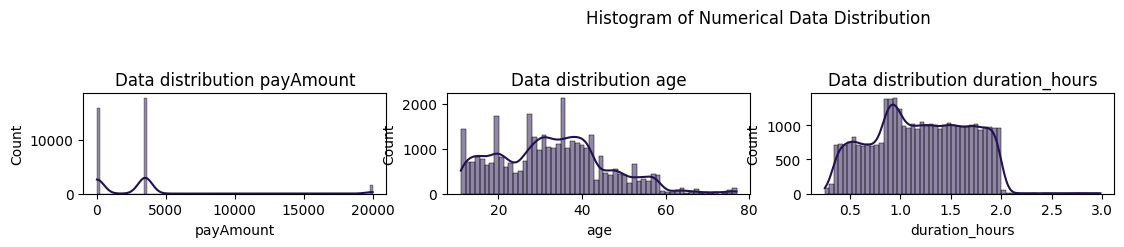

In [138]:
listKolomclean = ['payAmount', 'age', 'duration_hours']
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(18,6))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom == len(listKolomclean) :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.histplot(data=df, x=listKolomclean[kolom], kde=True)
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Histogram of Numerical Data Distribution', y=1.02, fontsize = 12)
plt.show()

## Outliers

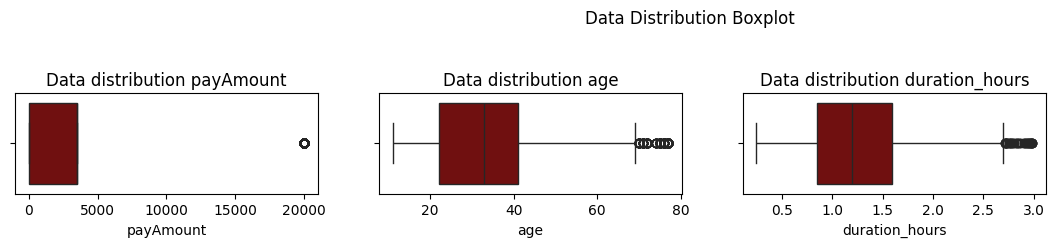

In [139]:
kolom=0
n_cols=4
n_rows=4
plt.figure(figsize=(18,6))
for i in range(n_rows) :
    for j in range(n_cols) :
        if kolom == len(listKolomclean) :
            break
        else :
            plt.subplot(n_rows,n_cols,kolom+1)
            sns.boxplot(data=df, x=listKolomclean[kolom], color='#800000')
            plt.title(f'Data distribution {listKolomclean[kolom]}')
            kolom+=1

plt.suptitle('Data Distribution Boxplot', y=1.02, fontsize = 12)
plt.show()

Conclusion:
*   Berdasarkan gammbar BoxPlot dapat dilihat terdapat outlier pada persebaran payAmount diangka 20000, di usia pengguna transjakarta diatas usia 70 tahun dan pada duearion hours atas 2,5. Outlier tidak perlu dihilangkan untuk keaslian data.

## Uji Normalitas

In [140]:
# Hanya kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [141]:
# Function to test normality
from statsmodels.stats.diagnostic import lilliefors

def normality_tests(df):
    results = {}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p_value = stats.kstest(df, 'norm')
    results['Kolmogorov-Smirnov'] = (ks_stat, ks_p_value)

    # Liliefors Test
    lilliefors_stat, lilliefors_p_value = lilliefors(df)
    results['Liliefors Test'] = (lilliefors_stat, lilliefors_p_value)

    # Shapiro-Wilk Test
    sw_stat, sw_p_value = stats.shapiro(df)
    results['Shapiro-Wilk'] = (sw_stat, sw_p_value)

    # D'Agostino and Pearson's Test
    dagostino_stat, dagostino_p_value = stats.normaltest(df)
    results['D\'Agostino Pearson'] = (dagostino_stat, dagostino_p_value)

    return results

# Function to determine normality based on p-value
def check_normality(p_value):
    if p_value > 0.05:
        return "Normal"
    else:
        return "Not Normal"

# Loop to test each numeric column
for column in numeric_columns:
    if df[column].dtype != 'timedelta64[ns]': # Exclude timedelta column
        print(f"RESULTS FOR {column}:")
        results = normality_tests(df[column])  # Removing missing values
        for test, (stat, p_value) in results.items():
            normality_status = check_normality(p_value)
            print(f"{test} - Statistic: {stat:.4f}, p-value: {p_value:.4f} -> {normality_status}")
        print("\n")

RESULTS FOR payCardBirthDate:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0529, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9766, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 933.5304, p-value: 0.0000 -> Not Normal


RESULTS FOR tapInStopsLat:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0537, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9885, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 473.7209, p-value: 0.0000 -> Not Normal


RESULTS FOR tapInStopsLon:
Kolmogorov-Smirnov - Statistic: 1.0000, p-value: 0.0000 -> Not Normal
Liliefors Test - Statistic: 0.0473, p-value: 0.0010 -> Not Normal
Shapiro-Wilk - Statistic: 0.9919, p-value: 0.0000 -> Not Normal
D'Agostino Pearson - Statistic: 392.6098, p-value: 0.0000 -> Not Normal


RESULTS FOR stopStartSeq:
Kolmogorov-Smirnov - Statistic: 0.8559, p-value: 0.0000 -> Not Norma

## Kesimpulan hasil test numerik dan outliers

- Semua data numerik bersifat tidak normal
- Outliers dalam analisa tidak perlu dihilangkan untuk menjaga keaslian data

## Eksplorasi data 1 : Eksplorasi umum untuk memulai analisa


















### Visualisasi kelompok umur pengguna

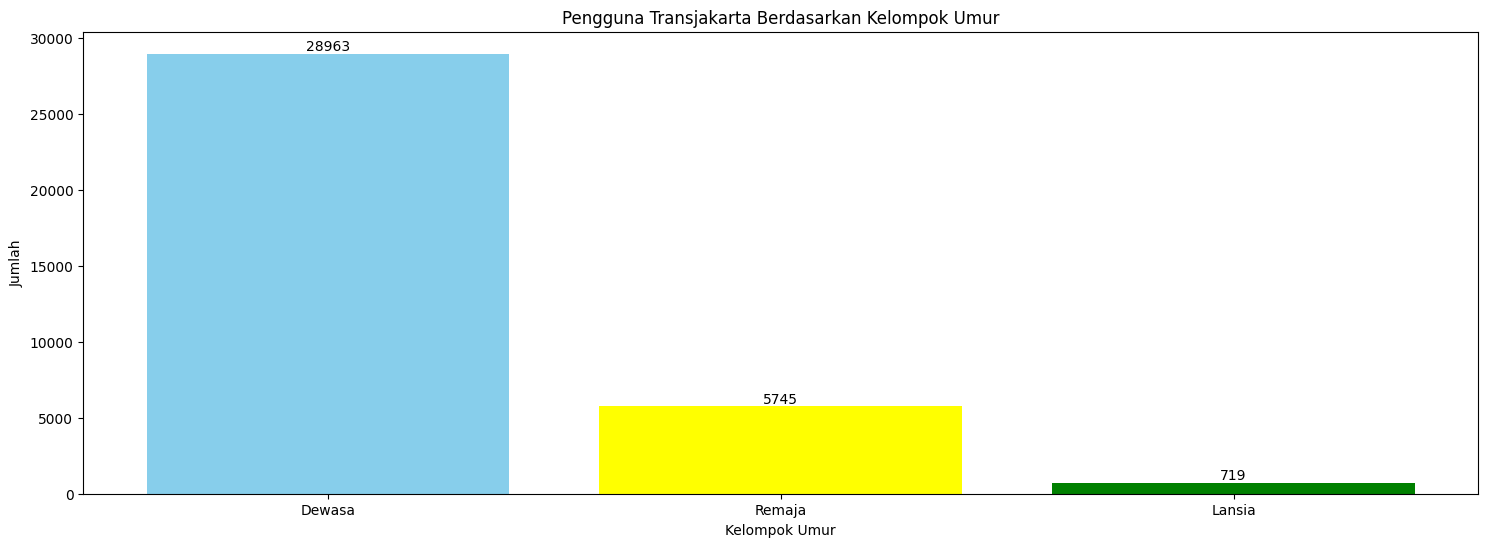


Total pengguna transjakarta berdasarkan kelompok umur: 
ageCategory
Dewasa    28963
Remaja     5745
Lansia      719
Name: count, dtype: int64


In [142]:
### visualisasi kelompok umur pengguna transjakarta

kelompok_umur_counts = df['ageCategory'].value_counts()


data_plot = pd.DataFrame({
    'kelompok umur': kelompok_umur_counts.index,
    'Count': kelompok_umur_counts.values
})

plt.figure(figsize=(18, 6))  # Ukuran diagram
plt.bar(data_plot['kelompok umur'], data_plot['Count'], color=['skyblue', 'yellow','green'])

# Menambahkan label nilai di atas setiap bar
for i in range(len(data_plot['kelompok umur'])):
  plt.text(i,data_plot['Count'][i], str(data_plot['Count'][i]), ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Pengguna Transjakarta Berdasarkan Kelompok Umur')
plt.xlabel('Kelompok Umur')
plt.ylabel('Jumlah')

# Menampilkan diagram
plt.show()


# Menampilkan hasil perhitungan
print("\nTotal pengguna transjakarta berdasarkan kelompok umur: ")
print(kelompok_umur_counts)

Mayoritas pengguna transjakarta adalah kelompok umur dewasa(Usia 19 - 59 Tahun).


### Distribusi pengguna berdasarkan jenis kelamin



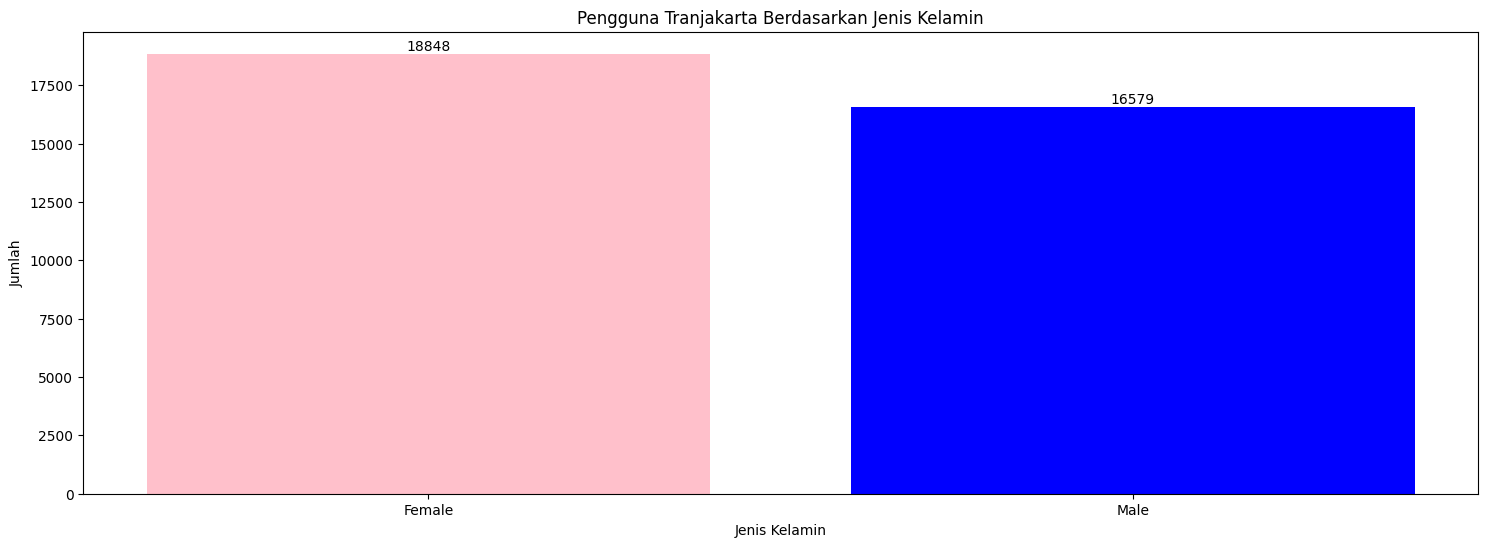

Banyaknya pengguna tranjakarta berdasarkan jenis kelamin: 
payCardSex
Female    18848
Male      16579
Name: count, dtype: int64


In [143]:
### visualisasi pengguna transjakarta berdasarkan jenis kelamin

pengguna_gender_counts = df['payCardSex'].value_counts()

data_gender = {
    'Jenis Kelamin' : pengguna_gender_counts.index,
    'Count' : pengguna_gender_counts.values,
}

data = pd.DataFrame(data_gender)

plt.figure(figsize=(18, 6))
plt.bar(data['Jenis Kelamin'], data['Count'], color=['pink', 'blue'])

# Menambahkan label nilai di atas setiap bar
for i in range(len(data['Jenis Kelamin'])):
  plt.text(i,data['Count'][i], str(data['Count'][i]), ha='center', va='bottom')

# Menambahkan judul dan label
plt.title('Pengguna Tranjakarta Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

# Menampilkan diagram
plt.show()

### Menampilkan hasil perhitungan
print("Banyaknya pengguna tranjakarta berdasarkan jenis kelamin: ")
print(pengguna_gender_counts)

Conclusion:
*   Pengguna transjarta didominasi oleh perempuan. Hal ini menunjukkan bahwa transjakarta menjadi pilihan transportasi yang aman dan nyaman bagi perempuan, baik untuk bepergian ke tempat kerja maupun tujuan lainnya.





### Metode transaksi yang paling banyak digunakan



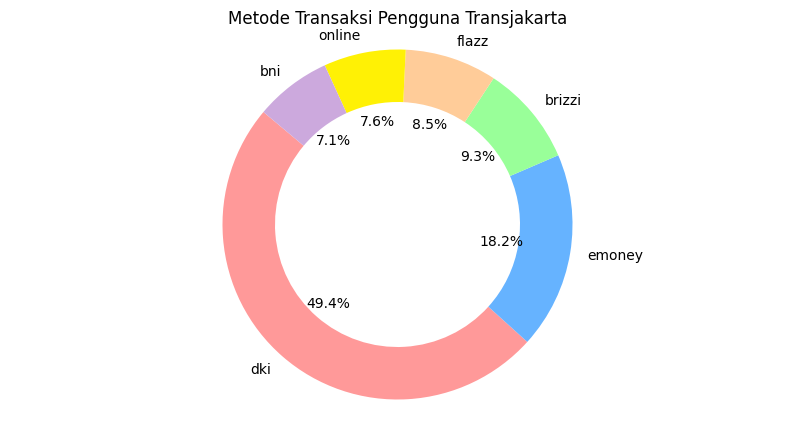

Banyaknya metode transaksi yang sering digunakan pengguna transjakarta: 
payCardBank
dki       17504
emoney     6439
brizzi     3285
flazz      3013
online     2683
bni        2503
Name: count, dtype: int64


In [144]:
### visualisasi metode pembayaran pengguna transjakarta

metode_transaksi_counts = df['payCardBank'].value_counts()

data_metode_pembayaran = {
    'Metode Transaksi' : metode_transaksi_counts.index,
    'Count' : metode_transaksi_counts.values,
}

data_plot = pd.DataFrame(data_metode_pembayaran)

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fff105','#cca9dd']
plt.figure(figsize=(10, 5))
plt.pie(data_plot['Count'], labels=data_plot['Metode Transaksi'], colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Metode Transaksi Pengguna Transjakarta')
plt.axis('equal')
plt.show()

### Menampilkan hasil perhitungan
print("Banyaknya metode transaksi yang sering digunakan pengguna transjakarta: ")
print(metode_transaksi_counts)




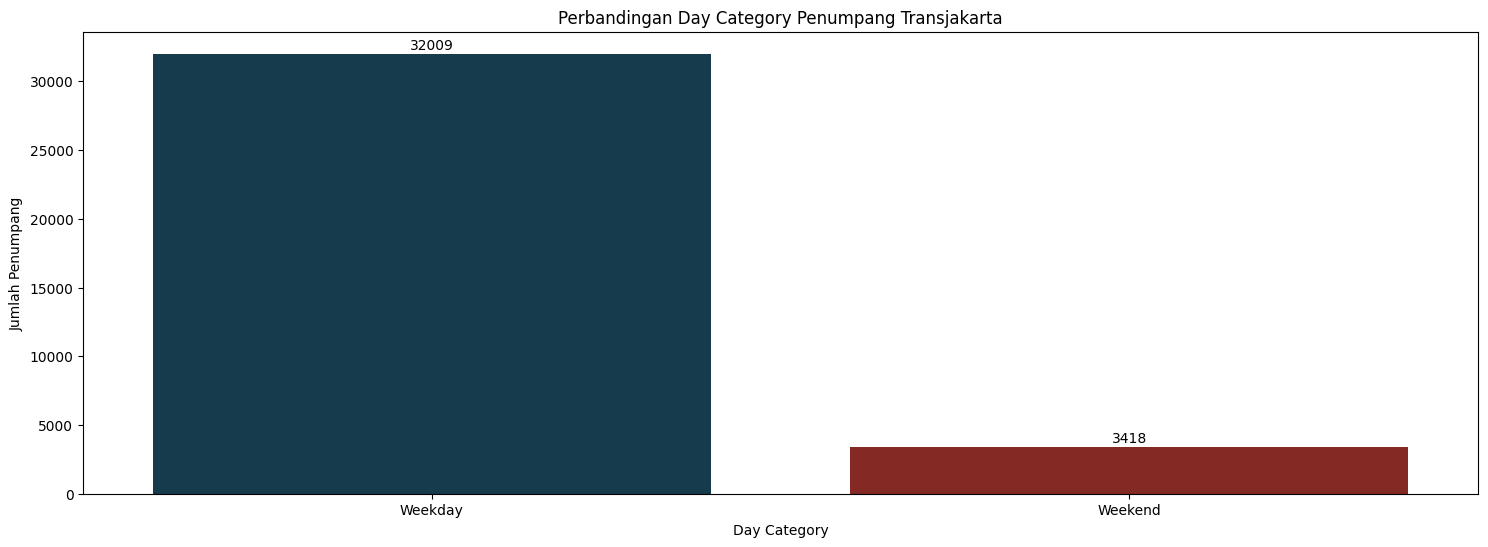

In [145]:
## visualisasi perbandingan pengguna transjakarta saat weekday dan weekend
plt.figure(figsize=(18, 6))
fig = sns.countplot(df, x = 'dayCategory', palette = {'Weekday': '#0d3e56', 'Weekend': '#941a14'})
for container in fig.containers:
    fig.bar_label(container, padding = 1)
plt.title('Perbandingan Day Category Penumpang Transjakarta')
plt.xlabel('Day Category')
plt.ylabel('Jumlah Penumpang')
plt.show()

Conclusion:

Terdapat perbandingan yang sangat jauh antara pengguna transjakarta saat weekday dan weekend. Hal ini dapat disimpulkan bahwa banyak yang menjadikan transjakarta sebagai moda transportasi utama.

### Perbedaan jumlah penumpang saat rush hour dan non rush hour



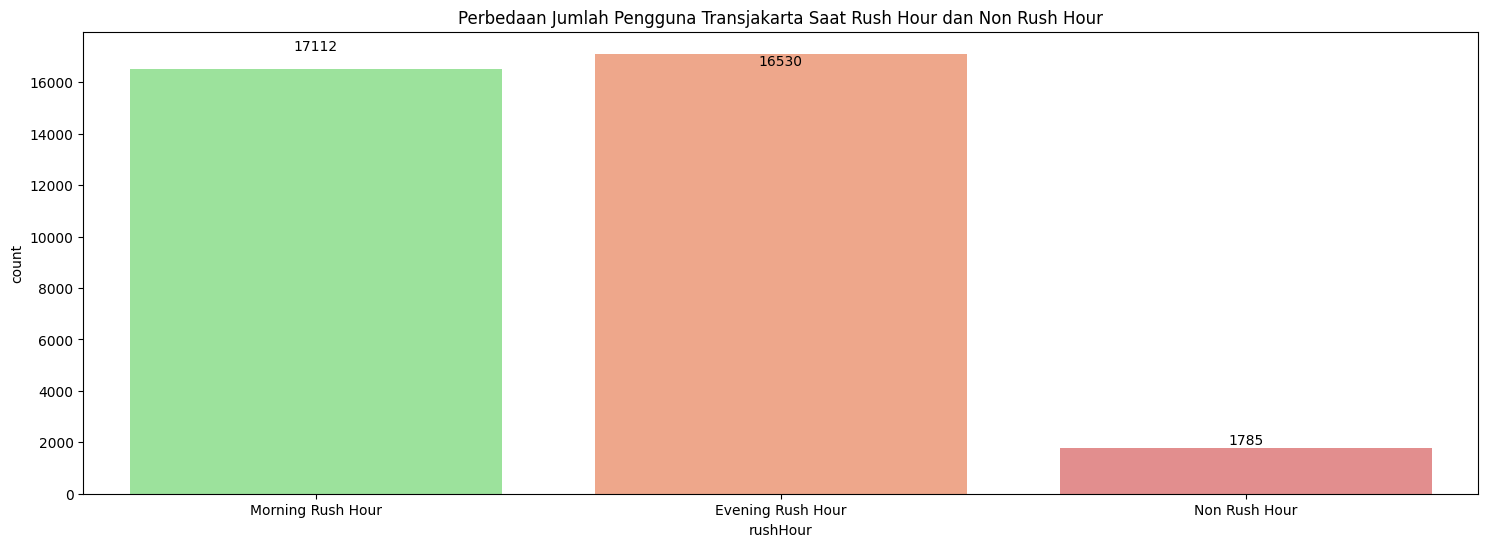

In [146]:
rushhour_counts = df['rushHour'].value_counts()
plt.figure(figsize=(18, 6))

# Calculate counts again to ensure it's up-to-date with the filtered df
rushhour_counts = df['rushHour'].value_counts()

# Create the countplot first
sns.countplot(x = 'rushHour', data = df, palette={"Morning Rush Hour": "lightgreen", "Evening Rush Hour": "lightsalmon", "Non Rush Hour": "lightcoral"})

# Menambahkan label nilai di atas setiap bar based on rushhour_counts
for i, count in enumerate(rushhour_counts.values):
  plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('Perbedaan Jumlah Pengguna Transjakarta Saat Rush Hour dan Non Rush Hour')
plt.show()

Conclusion:


*   Berdasarkan data dapat disimpulkan bahwa ada perbedaan signifikan jumlah penumpang saat rush hour dan non rush hour.



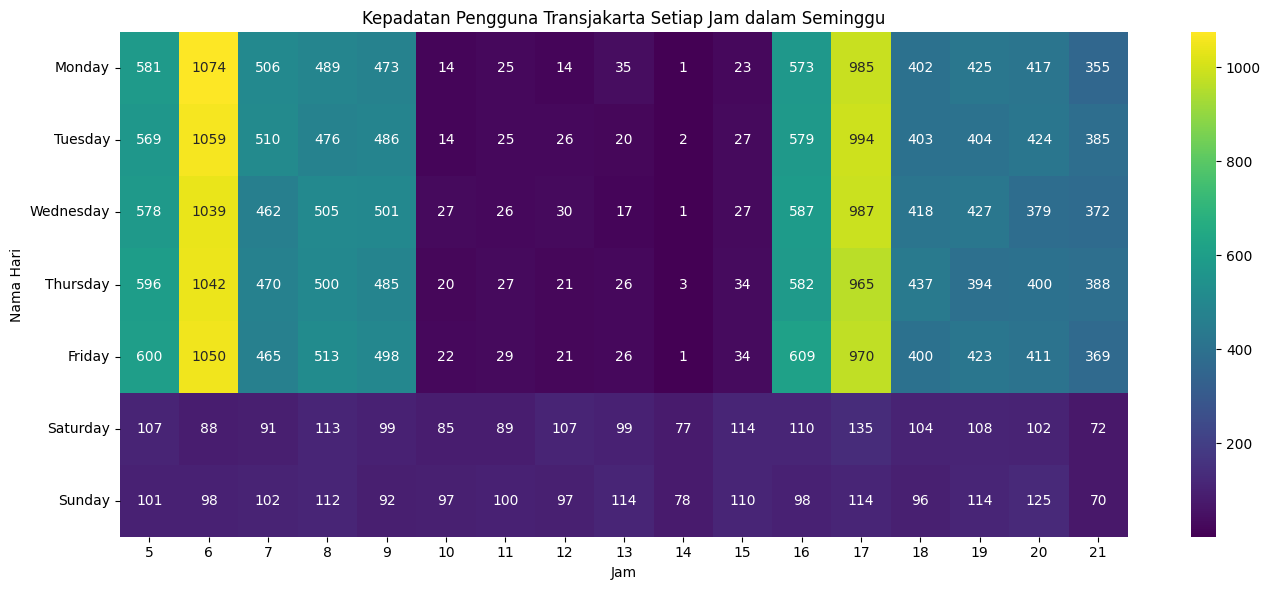

In [147]:
# perbandingan kepadatan pengguna transjakarta setiap jam dalam weekly
df['weekly'] = df['tapInTime'].dt.day_name()
hari = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmapp = pd.crosstab(df['weekly'], df['hour']).reindex(hari)
plt.figure(figsize=(14, 6))
sns.heatmap(heatmapp, cmap='viridis', annot=True, fmt='.0f')
plt.title('Kepadatan Pengguna Transjakarta Setiap Jam dalam Seminggu')
plt.xlabel('Jam')
plt.ylabel('Nama Hari')
plt.tight_layout()
plt.show()

Conclusion:


*   Dari pola diatas dapat disimpulkan bahwa pengguna transjakarta meningkat saat hari kerja (weekdays) dan menurun drastis saat hari sabtu dan minggu (weekend).


*   Kepadatan pengguna transjakarta tertinggi dalam jam terjadi pada weekday jam 6.00 dan 17.00.



In [148]:
df_weekday = df[df['dayCategory'] == 'Weekday']



### Trend pengguna pada April 2023



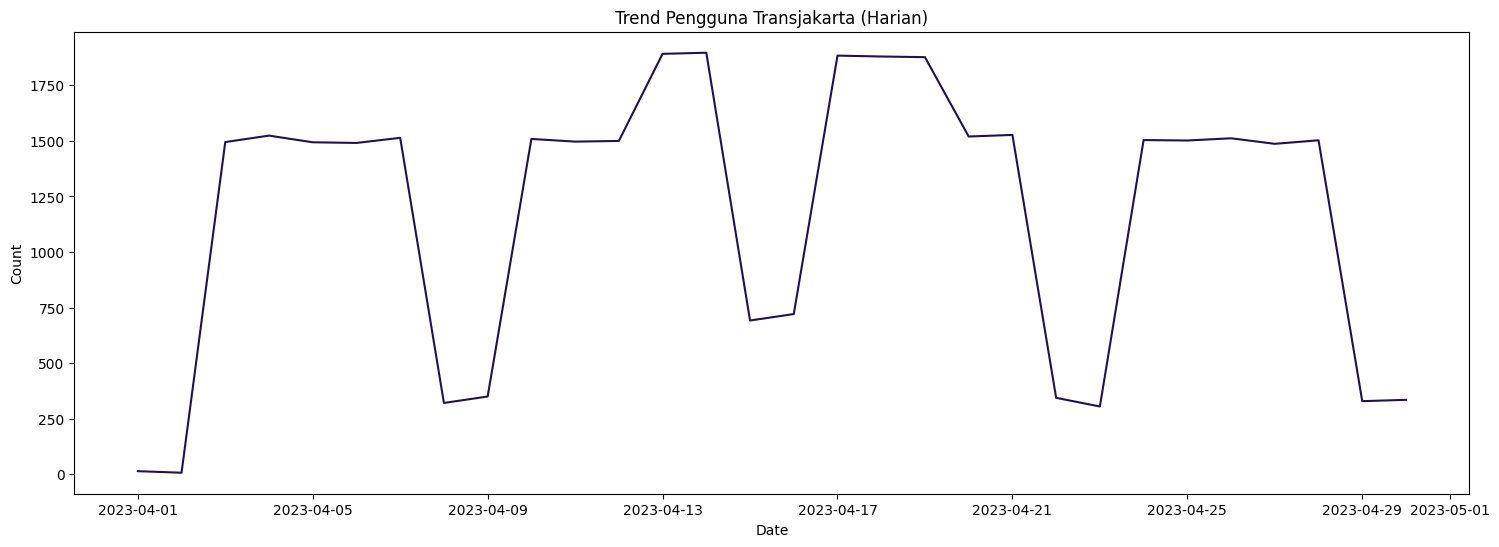

In [149]:
tren_pengguna = df.groupby(['tapInDate', 'day_of_week'])['transID'].count().reset_index()

import matplotlib.pyplot as plt

# Membuat figure dengan ukuran yang diinginkan (lebar=10 inci, tinggi=6 inci)
plt.figure(figsize=(18, 6))

# Membuat grafik garis
plt.plot(tren_pengguna['tapInDate'], tren_pengguna['transID'])

# Menambahkan judul dan label sumbu
plt.title("Trend Pengguna Transjakarta (Harian)")
plt.xlabel("Date")
plt.ylabel("Count")

# Menampilkan grafik
plt.show()

### Kesimpulan EDA 1

- Sebagian besar usia produktif yang menggunakan layanan transjakarta dan sebagian kecil merupakan remaja yang kemungkinan besar sedang sekolah
- Perempuan sebagian besar memilih metode transportasi transjakarta
- Metode transaksi terbanyak adalah paycard DKI
- Analisa dilakukan fokusnya pada weekday karena perbedaan yang signifikan
- Analisa dilakukan di beberapa bagian rush hour dan non rush hour

## Eksplorasi data 2 : Eksplorasi lebih dalam

#### Apakah terdapat perbedaan pola berdasarkan usia atau jenis kelamin?



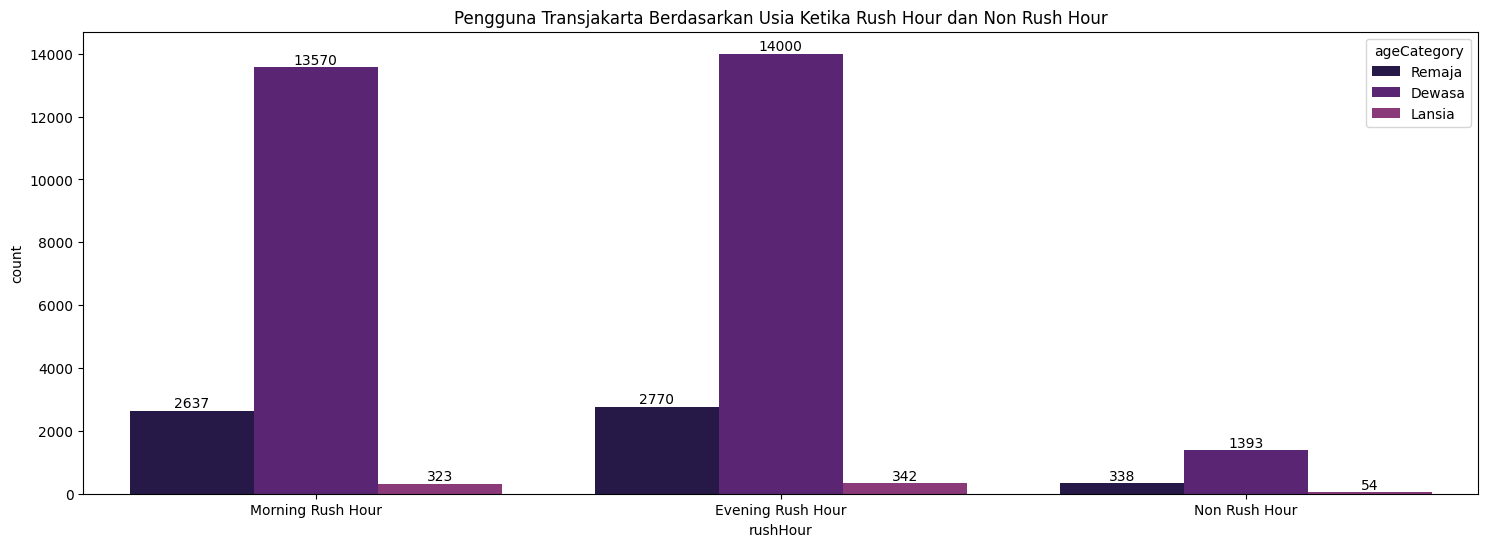

In [150]:
# Pola pengguna transjakarta berdasarkan kelompok usia
plt.figure(figsize=(18, 6))

ax = sns.countplot(x = 'rushHour', hue = 'ageCategory', data = df)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)

plt.title('Pengguna Transjakarta Berdasarkan Usia Ketika Rush Hour dan Non Rush Hour')
plt.show()

In [151]:
rhage = pd.crosstab(df_weekday['rushHour'], df_weekday['ageCategory'])

chi2, p_value, dof, expected = chi2_contingency(rhage)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan antara kategori rush hour dan kategori usia.')
else:
    print('Tidak terdapat hubungan antara kategori rush hour dan kategori usia.')

Uji Chi Squared:
P-Value: 0.005346059667363981
Terdapat hubungan antara kategori rush hour dan kategori usia.


Conclusion :

- Pada rush hour dan non rush hour kategori usia dewasa paling banyak
- Hasil pengujian chi-squared terdapat hubungan
- Hal ini terjadi karena usia ini merupakan usia produktif

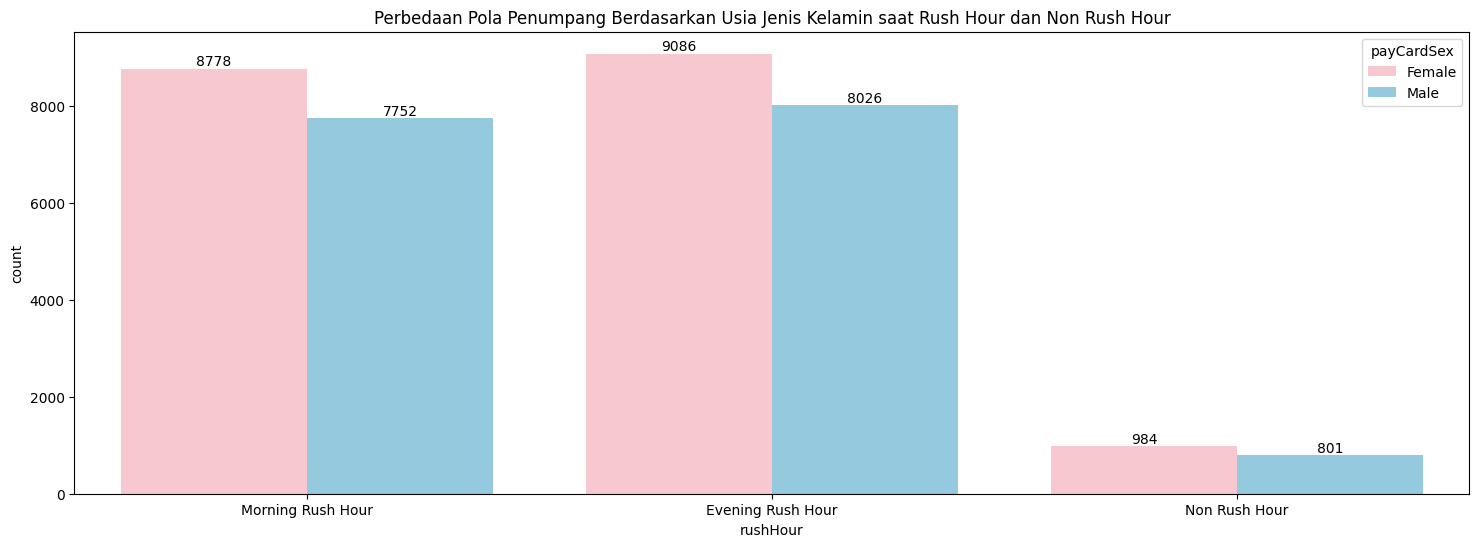

In [152]:
# Pola pengguna transjakarta berdasarkan jenis kelamin
plt.figure(figsize=(18, 6))
ax = sns.countplot(x = 'rushHour', hue = 'payCardSex', data = df, palette={"Female": "pink", "Male": "skyblue"})
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Perbedaan Pola Penumpang Berdasarkan Usia Jenis Kelamin saat Rush Hour dan Non Rush Hour')
plt.show()

In [153]:
rhkel = pd.crosstab(df_weekday['rushHour'], df_weekday['payCardSex'])

chi2, p_value, dof, expected = chi2_contingency(rhkel)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan antara kategori rush hour dan jenis kelamin.')
else:
    print('Tidak terdapat hubungan antara kategori rush hour dan jenis kelamin.')

Uji Chi Squared:
P-Value: 0.23229454607520722
Tidak terdapat hubungan antara kategori rush hour dan jenis kelamin.


Conclusion:


* Tidak ada hubungan signifikan, perempuan lebih banyak memakai transportasi umum oleh karena itu kenyamanan dan keamanan harus lebih diperhatikan untuk perempuan



### Pola transaksi yang paling banyak digunakan

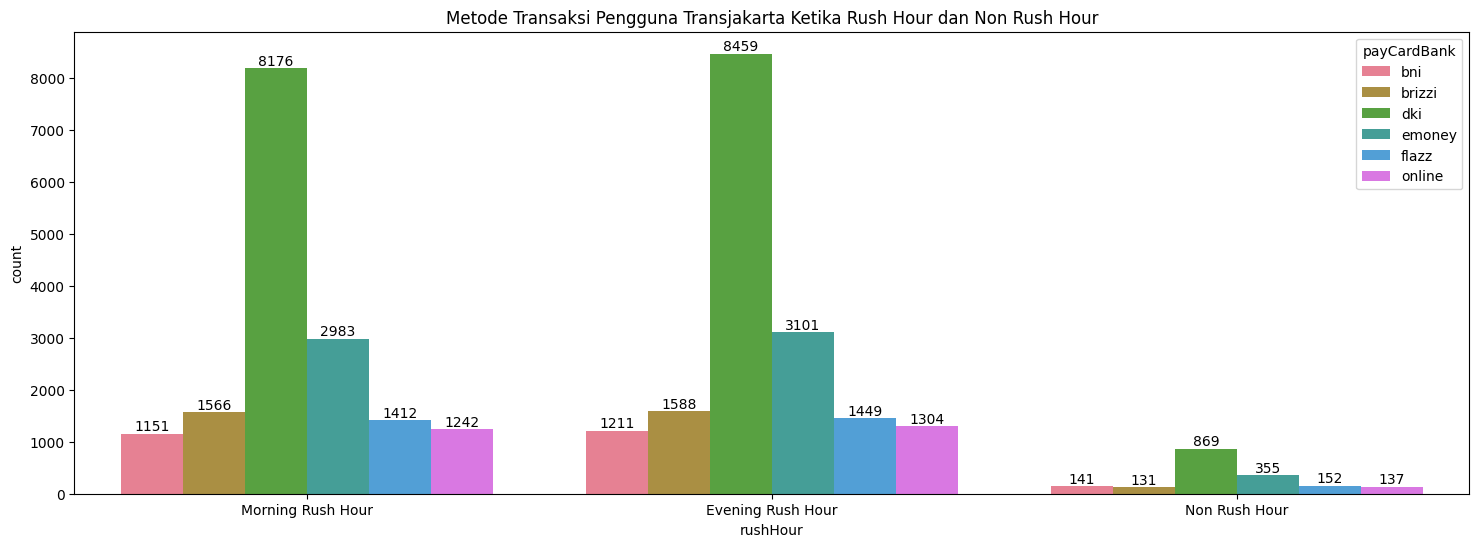

In [154]:
### visualisasi transaksi yang serig digunakan pengguna transjakarta saat rush hours dan non rush hour
plt.figure(figsize=(18, 6))

ax = sns.countplot(x = df['rushHour'], hue = df['payCardBank'], data = df, palette = 'husl')
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)

plt.title('Metode Transaksi Pengguna Transjakarta Ketika Rush Hour dan Non Rush Hour')
plt.show()

In [155]:
rhp = pd.crosstab(df_weekday['rushHour'], df_weekday['payCardBank'])

chi2, p_value, dof, expected = chi2_contingency(rhp)
p_value

print(f'Uji Chi Squared:')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('Terdapat hubungan antara kategori rush hour dan metode pembayaran.')
else:
    print('Tidak terdapat hubungan antara kategori rush hour dan metode pembayaran.')

Uji Chi Squared:
P-Value: 0.1407610824768923
Tidak terdapat hubungan antara kategori rush hour dan metode pembayaran.


Conclusion:

* Tidak ada hubungan signifikan metode transaksi pembayaran kartu DKI paling banyak digunakan oleh pengguna
transjakarta.




### Koridor mana saja yang mengalami kepadatan saat rush hour?



In [156]:
## pisah rush dan non_rush
daily_counts = df.groupby(['tapInDate', 'rushHour']).size().reset_index(name='passenger_count')
rush = daily_counts[(daily_counts['rushHour'] == 'Morning Rush Hour') | (daily_counts['rushHour'] == 'Evening Rush Hour')]['passenger_count']
non_rush = daily_counts[daily_counts['rushHour'] == 'Non Rush Hour']['passenger_count']

In [157]:
# Koridor yang mengalami kepadatan saat rush hour
koridor_rushHour = df.groupby('rushHour')['corridorID'].value_counts().reset_index()

In [158]:
## 10 koridor terbanyak saat Morning Rush Hour dan evening rush hour
top_morning_rushHour = koridor_rushHour[koridor_rushHour['rushHour'] == 'Morning Rush Hour'].sort_values('count', ascending=False).head(10)
top_evening_rushHour = koridor_rushHour[koridor_rushHour['rushHour'] == 'Evening Rush Hour'].sort_values('count', ascending=False).head(10)

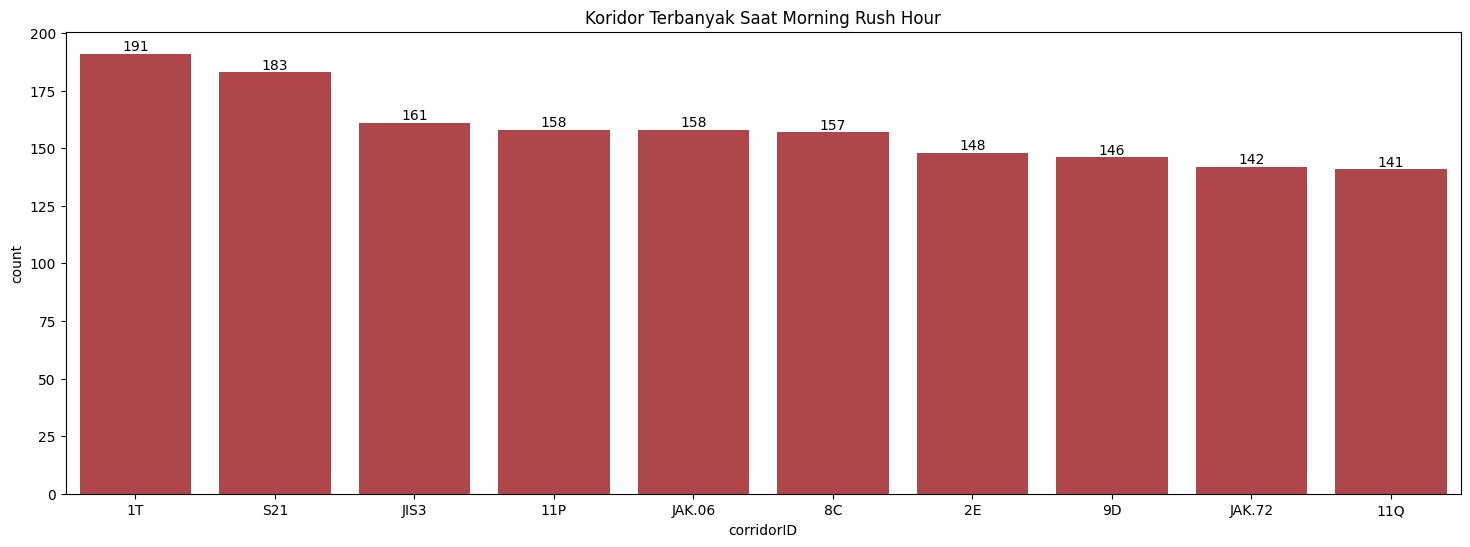

Posisi 1 dan 2 : 
['Cibubur - Balai Kota' 'Ciputat - CSW']


In [159]:
### morning rushHour
plt.figure(figsize=(18, 6))
sns.set_palette("RdBu")
ax = sns.barplot(x = 'corridorID', y = 'count', data = top_morning_rushHour)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Koridor Terbanyak Saat Morning Rush Hour')
plt.show()

print('Posisi 1 dan 2 : ')
print(df.loc[df['corridorID'].isin(['1T', 'S21']), 'corridorName'].unique())

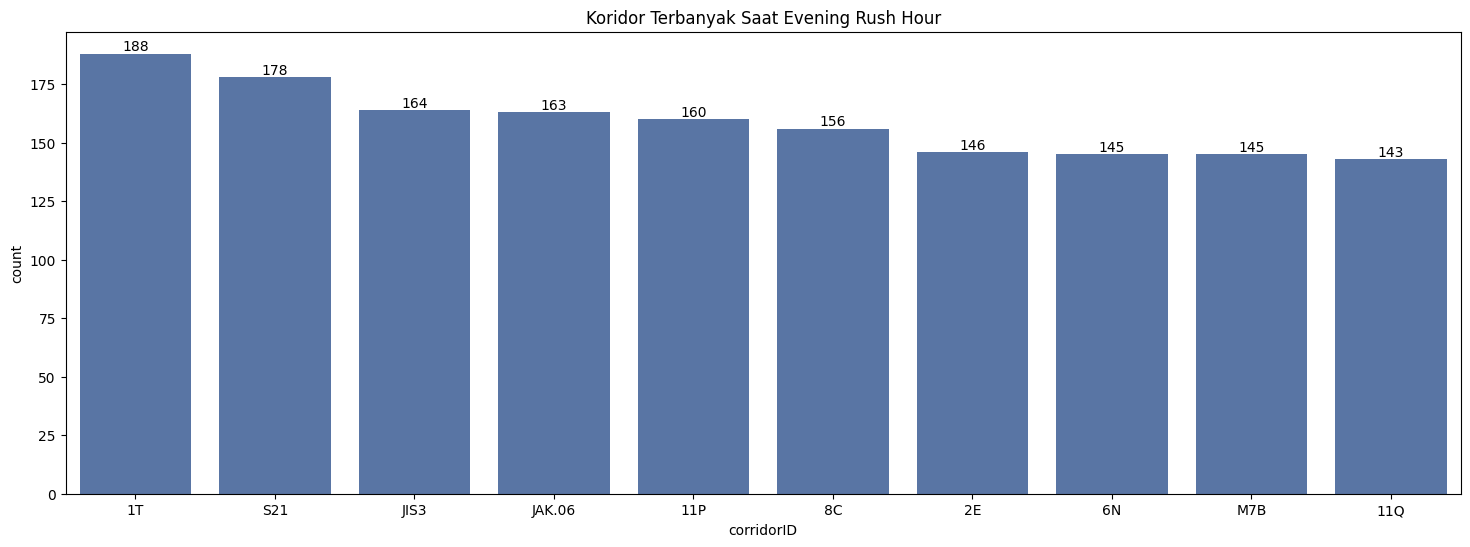

Posisi 1 dan 2 : 
['Cibubur - Balai Kota' 'Ciputat - CSW']


In [160]:
### Evening rushHour
plt.figure(figsize=(18, 6))
sns.set_palette("deep")
ax=sns.barplot(x = 'corridorID', y = 'count', data = top_evening_rushHour)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Koridor Terbanyak Saat Evening Rush Hour')
plt.show()

print('Posisi 1 dan 2 : ')
print(df.loc[df['corridorID'].isin(['1T', 'S21']), 'corridorName'].unique())

Conclusion:


*   
Koridor terpadat saat rush hour pagi dan sore hari yaitu, 1T, S21 dan JIS3.



### Halte mana saja yang paling banyak Tap In?




Text(0.5, 1.0, 'Top 10 Halte Yang Paling Banyak Tap In Saat Morning Rush Hour')

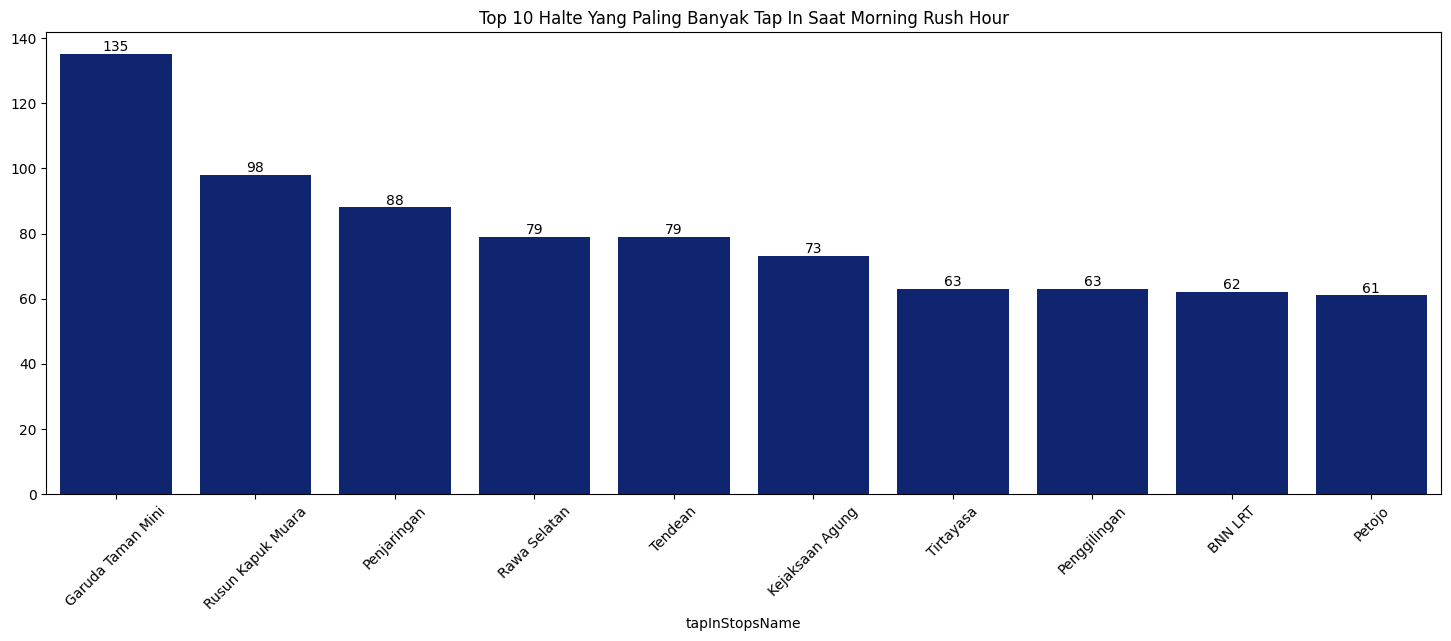

In [161]:
# morning
plt.figure(figsize=(18, 6))
sns.set_palette("dark")
top_10_tapin_morning = df[df['rushHour'] == 'Morning Rush Hour']['tapInStopsName'].value_counts().head(10)
ax = sns.barplot(x = top_10_tapin_morning.index, y = top_10_tapin_morning.values)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Top 10 Halte Yang Paling Banyak Tap In Saat Morning Rush Hour')

Text(0.5, 1.0, 'Top 10 Halte Yang Paling Banyak Tap In Saat Evening Rush Hour')

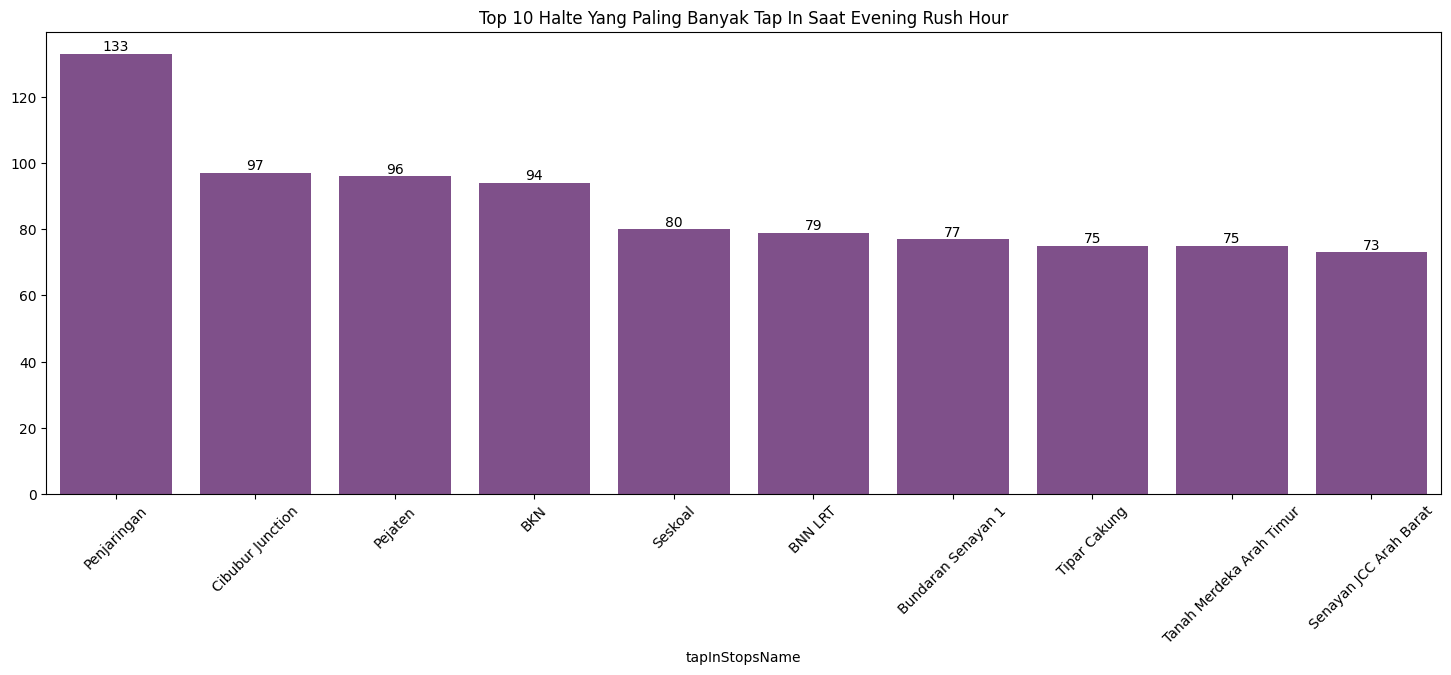

In [162]:
# evening
plt.figure(figsize=(18, 6))
sns.set_palette("PRGn")
top_10_tapin_evening = df[df['rushHour'] == 'Evening Rush Hour']['tapInStopsName'].value_counts().head(10)
ax = sns.barplot(x = top_10_tapin_evening.index, y = top_10_tapin_evening.values)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Top 10 Halte Yang Paling Banyak Tap In Saat Evening Rush Hour')

Conclusion:

*   Halte Garuda Taman Mini adalah halte yang paling banyak tap in saat jam sibuk pagi. Dan halte Penjaringan adalah halte yang paling banyak tap in saat jam sibuk sore.



### Halte mana saja yang paling banyak Tap Out?

Text(0.5, 1.0, 'Top 10 Halte Yang Paling Banyak Tap Out Saat Morning Rush Hour')

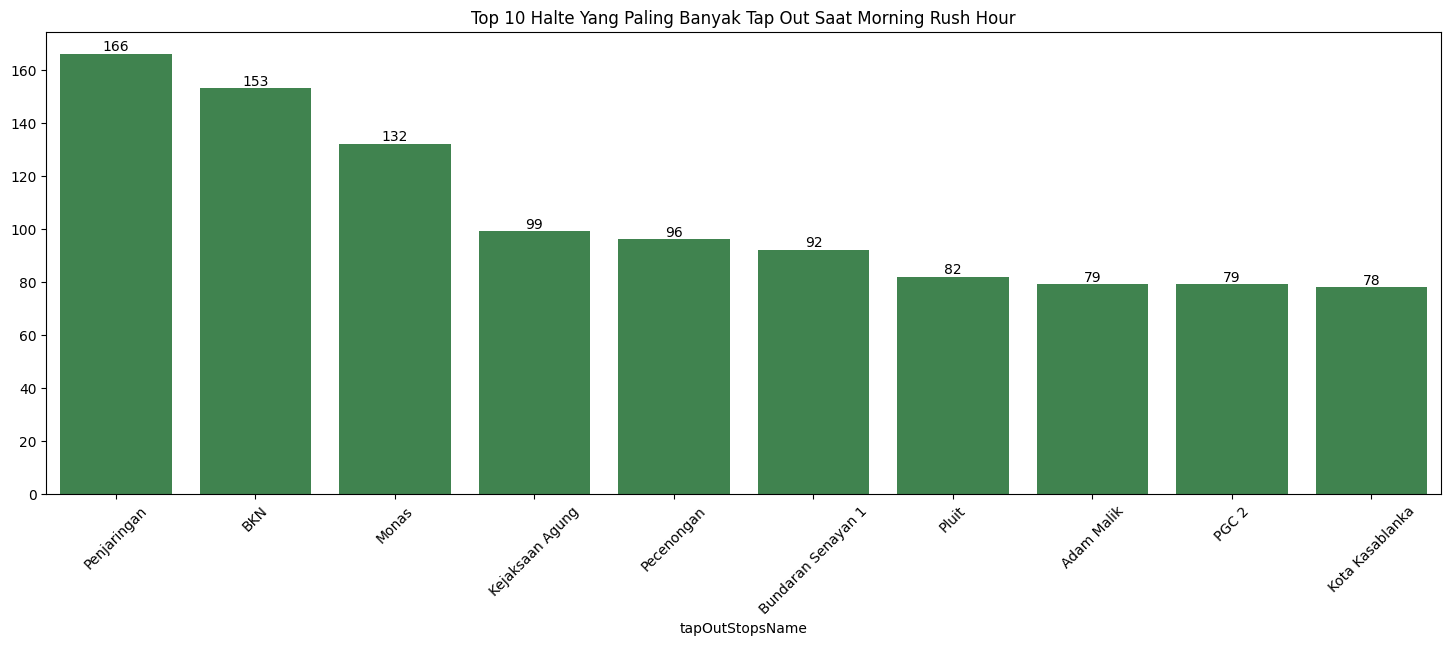

In [163]:
# morning rush Hour
plt.figure(figsize=(18, 6))
sns.set_palette("PRGn_r")
top_10_tapout_morning = df[df['rushHour'] == 'Morning Rush Hour']['tapOutStopsName'].value_counts().head(10)
ax = sns.barplot(x = top_10_tapout_morning.index, y = top_10_tapout_morning.values)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Top 10 Halte Yang Paling Banyak Tap Out Saat Morning Rush Hour')

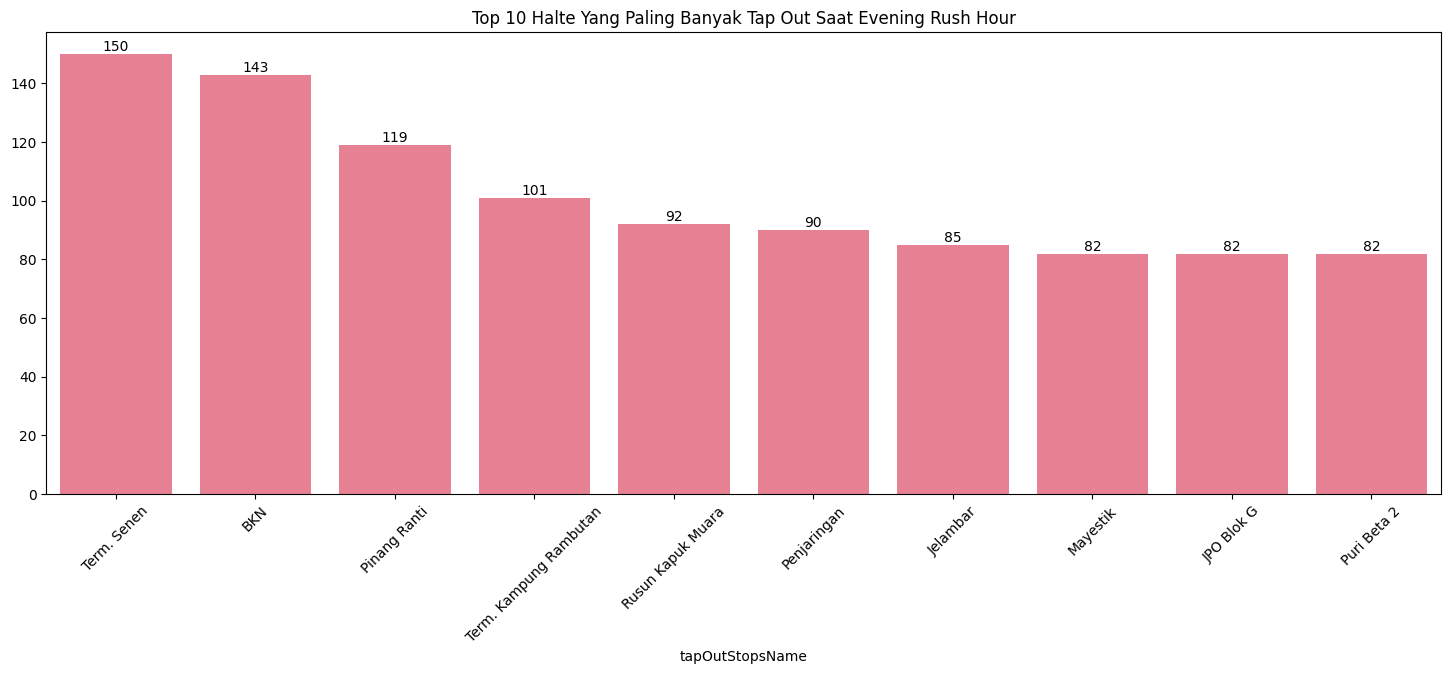

In [164]:
# evening rush Hour
plt.figure(figsize=(18, 6))
sns.set_palette("husl")
top_10_tapout_evening = df[df['rushHour'] == 'Evening Rush Hour']['tapOutStopsName'].value_counts().head(10)
ax = sns.barplot(x = top_10_tapout_evening.index, y = top_10_tapout_evening.values)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=45)
plt.title('Top 10 Halte Yang Paling Banyak Tap Out Saat Evening Rush Hour')
plt.show()

Conclusion:


*   Halte yang paling banyak tap out saat jam sibuk pagi adalah halte Penjaringan dan saat jam sibuk sore adalah halte Terminal Senen.



### Bagaimana durasi perjalanan saat rush hour dan non rush hour





In [165]:
morning_duration = df[(df['rushHour'] == 'Morning Rush Hour')]['duration_hours']
morning_duration.mean()

np.float64(1.00151816562479)

In [166]:
evening_duration = df[(df['rushHour'] == 'Evening Rush Hour')]['duration_hours']
evening_duration.mean()

np.float64(1.3982173003999792)

In [167]:
nonrush_duratation = df[(df['rushHour']== 'Non Rush Hour')]['duration_hours']
nonrush_duratation.mean()

np.float64(1.1993446934329286)

In [168]:
duration = pd.DataFrame({
    'Morning Rush Hour': morning_duration.mean(),
    'Evening Rush Hour': evening_duration.mean(),
    'Non Rush Hour': nonrush_duratation.mean()
}, index=['Duration'])
duration

,Morning Rush Hour,Evening Rush Hour,Non Rush Hour
Duration,1.001518,1.398217,1.199345


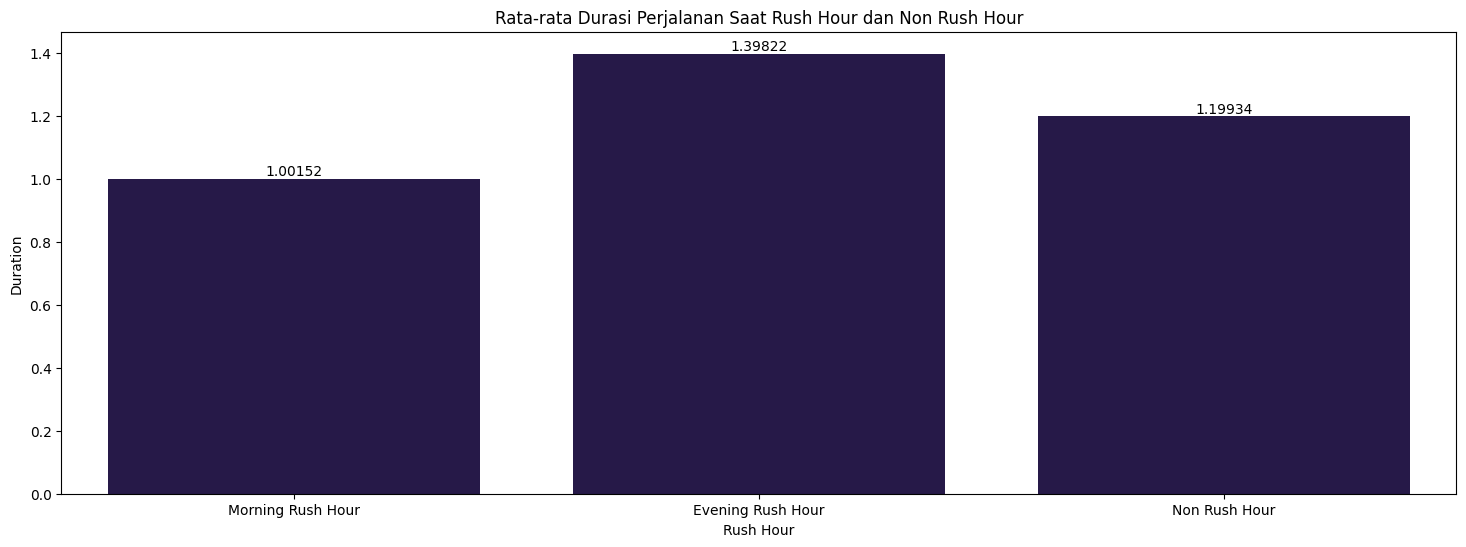

In [169]:
plt.figure(figsize=(18, 6))
sns.set_palette("magma")
# Transpose the DataFrame for plotting
duration_plot = duration.T.reset_index()
duration_plot.columns = ['Rush Hour', 'Duration']
ax = sns.barplot(x='Rush Hour', y='Duration', data=duration_plot)
# Menambahkan label pada setiap bar
for container in ax.containers:
    ax.bar_label(container)
plt.title('Rata-rata Durasi Perjalanan Saat Rush Hour dan Non Rush Hour')
plt.show()

In [170]:
# Uji T untuk mengetahui perbedaan rata-rata durasi pada saat rush hour dan non rush hour
rush_duration = df[(df['rushHour'] == 'Morning Rush Hour') | (df['rushHour'] == 'Evening Rush Hour')]['duration_hours']
non_rush_duration = df[df['rushHour'] == 'Non Rush Hour']['duration_hours']

t_stat, p_val = ttest_ind(rush_duration, non_rush_duration, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

if p_val < 0.05:
    print("Terdapat perbedaan signifikan antara rata-rata durasi perjalanan saat rush hour dan non rush hour.")
else:
    print("Tidak terdapat perbedaan signifikan antara rata-rata durasi perjalanan saat rush hour dan non rush hour.")

t-statistic: 0.3144198046892874
p-value: 0.753236064129656
Tidak terdapat perbedaan signifikan antara rata-rata durasi perjalanan saat rush hour dan non rush hour.


Conclusion:


*   Berdasarkan hasil analisis dapat disimpulkan meskipun pada jam sibuk transjakarta dipadati penumpang, durasi perjalanan pada dasarnya tidak terpengaruh secara signifikan karena beberapa faktor. Transjakarta memiliki jalur khusus yang meminimalkan kemacetan, serta armada dan jadwal yang diatur untuk mengantisipasi peningkatan penumpang di jam sibuk.

*   Berdasarkan data, dapat dilihat bahwa rata-rata durasi perjalanan pada non rush hour cenderung lebih tinggi dibandingan dengan rush hour. Pada jam-jam sibuk, jalur khusus transjakarta seringkali lebih lancar karena kendaraan pribadi lebih sedikit yang beroperasi di jalan raya. Hal ini memungkinkan bus Transjakarta bergerak lebih cepat dan waktu tempuh antar halte menjadi lebih singkat. di luar jam sibuk, meskipun jalur busway tetap eksklusif, kemacetan di jalan raya di sekitar halte atau persimpangan jalan bisa mempengaruhi waktu tempuh bus. Selain itu, ada kemungkinan pengurangan frekuensi bus pada jam-jam tertentu di luar jam sibuk.

* Jam sibuk pada Transjakarta, yang terjadi pada pagi dan sore hari, dapat mengurangi efisiensi operasional koridor. Saat jam sibuk, lonjakan penumpang yang signifikan dapat menyebabkan kepadatan di halte dan bus, waktu tunggu yang lebih lama, serta potensi keterlambatan bus. Meskipun Transjakarta memiliki jalur khusus, kepadatan lalu lintas umum lainnya di sekitar koridor tetap dapat memengaruhi headway (waktu antar bus).

# Kesimpulan dan solusi (Tolong diisi juga)

1. Kesimpulan
-	Kelompok umur pengguna transjakarta yaitu,remaja, dewasa dan lansia.
-	Pengguna transjakarta didominasi oleh perempuan.
-	Jenis transaksi yang paling banyak digunakan adalah kartu dki.
-	Kepadatan pengguna transjakarta terjadi saat weekday dan terjadi saat evening rush hour pukul 17.00.
-	Menunjukkan bahwa sebagian besar pengguna saat rush hour adalah kelompok usia produktif, yaitu 19- 59 tahun dengan didominasi pengguna berjenis kelamin perempuan
-	Koridor mana saja yang mengalami kepadatan saat rush hour ?  Koridor yang mengalami kepadatan saat rush hour yaitu 1T, S21, dan JIS3.
-	Halte yang mengalami tap in paling banyak garuda taman mini.
-	Halte dengan tap out paling banyak halte penjaringan
-	Rush hour (jam sibuk) memberikan dampak negatif pada efisiensi koridor Transjakarta. Peningkatan volume kendaraan, terutama pada jam masuk dan pulang kerja, menyebabkan kemacetan pada jalur umum yang pada akhirnya memengaruhi waktu tempuh dan keteraturan operasional Transjakarta.
-	Saat jam sibuk (rush hour), waktu tempuh perjalanan Transjakarta bisa lebih lama dari biasanya karena kepadatan lalu lintas.  





2. Solusi
-	Untuk meningkatkan penggunaan Transjakarta oleh seluruh kelompok umur, beberapa solusi dapat diimplementasikan. Solusi ini mencakup peningkatan fasilitas, kemudahan akses, dan kampanye edukasi.
-	Untuk mencapai keseimbangan pengguna Transjakarta antara perempuan dan laki-laki, beberapa solusi dapat diterapkan. Pertama, perlu adanya peningkatan keamanan dan kenyamanan bagi perempuan, seperti menyediakan ruang khusus perempuan di dalam bus, layanan bus khusus perempuan (Bus Pink), dan patroli keamanan yang ditingkatkan. Kedua, perlu ada upaya untuk mengubah paradigma sosial yang bias gender dan diskriminasi terhadap perempuan, serta meningkatkan kesadaran akan kesetaraan gender di masyarakat. Ketiga, perlu ada kebijakan yang mendukung kesetaraan gender, seperti cuti parental yang setara bagi laki-laki dan perempuan, serta kuota gender dalam posisi kepemimpinan.
-	Untuk meratakan penggunaan jenis transaksi di Transjakarta, beberapa solusi dapat diimplementasikan. Pertama, meningkatkan kesadaran dan promosi tentang berbagai metode pembayaran yang tersedia, termasuk kartu uang elektronik, QRIS melalui aplikasi, dan pembayaran melalui aplikasi smartphone. Kedua, memastikan ketersediaan dan fungsionalitas semua opsi pembayaran di seluruh halte. Ketiga, memberikan insentif atau promo menarik untuk mendorong penggunaan metode pembayaran non-tunai. Keempat, meningkatkan edukasi dan pelatihan kepada petugas di halte untuk membantu penumpang dalam menggunakan berbagai metode pembayaran. Kelima, terus mengembangkan dan menyempurnakan aplikasi Transjakarta agar lebih user-friendly dan terintegrasi dengan berbagai metode pembayaran.
-	Untuk mengatasi disparitas jumlah penumpang Transjakarta antara hari kerja (weekday) dan akhir pekan (weekend), beberapa solusi dapat diterapkan. Ini termasuk peningkatan frekuensi layanan, penyesuaian rute, serta peningkatan fasilitas dan informasi. Selain itu, edukasi dan promosi penggunaan Transjakarta juga penting untuk meningkatkan kesadaran masyarakat.
-	Perbedaan jumlah penumpang saat rush hour dan non rush hour
-	Perbedaan jumlah penumpang pada saat jam sibuk (rush hour) dan di luar jam sibuk (non-rush hour) sangat signifikan. Pada jam sibuk, jumlah penumpang akan melonjak drastis karena orang-orang bepergian untuk bekerja atau sekolah. Sebaliknya, di luar jam sibuk, jumlah penumpang cenderung lebih sedikit karena aktivitas masyarakat lebih bervariasi dan tidak terpusat pada waktu tertentu.
Untuk meratakan kepadatan di koridor Transjakarta, beberapa solusi yang bisa diterapkan antara lain: optimalisasi waktu operasional, penambahan armada, perluasan rute, peningkatan integrasi antar moda, serta edukasi dan sosialisasi kepada penumpang.
-	Untuk meratakan distribusi "tap in" di Transjakarta, beberapa solusi dapat dipertimbangkan. Pertama, perlu ada peningkatan jumlah mesin tap in di halte, terutama pada jam sibuk dan di halte-halte transit. Kedua, sosialisasi yang lebih intensif tentang pentingnya "tap in" dan "tap out" serta cara melakukannya dengan benar perlu dilakukan. Ketiga, integrasi sistem pembayaran yang lebih luas, seperti penggunaan QRIS, dapat mengurangi ketergantungan pada kartu fisik dan potensi antrian.
-	Untuk mengatasi masalah tap out Transjakarta yang tidak merata, beberapa solusi dapat diterapkan. Pertama, pastikan mesin tap out berfungsi dengan baik dan mudah diakses oleh penumpang. Kedua, sosialisasikan aturan tap out dengan jelas dan sering kepada penumpang. Ketiga, berikan sanksi yang tegas bagi penumpang yang tidak melakukan tap out untuk meningkatkan kedisiplinan. Keempat, sediakan petugas di halte untuk membantu penumpang yang mengalami kesulitan. Kelima, pertimbangkan penggunaan teknologi seperti sensor atau kamera untuk memantau kepatuhan penumpang.
-	Rush hour (jam sibuk) memberikan dampak negatif pada efisiensi koridor Transjakarta. Peningkatan volume kendaraan, terutama pada jam masuk dan pulang kerja, menyebabkan kemacetan pada jalur umum yang pada akhirnya memengaruhi waktu tempuh dan keteraturan operasional Transjakarta.
Saat jam sibuk (rush hour), waktu tempuh perjalanan Transjakarta bisa lebih lama dari biasanya karena kepadatan lalu lintas. Namun, Transjakarta telah menargetkan waktu tempuh maksimal 35 menit untuk beberapa rute tertentu dengan upaya sterilisasi jalur dan peningkatan layanan.
-	Solusi untuk mengurangi durasi perjalanan Transjakarta saat jam sibuk adalah dengan meningkatkan frekuensi layanan, memperbanyak armada bus, mengatur waktu tunggu penumpang, dan memastikan jalur khusus busway bebas hambatan. Selain itu, perlu juga mempertimbangkan manajemen waktu perjalanan, seperti berangkat lebih awal atau menggunakan aplikasi untuk memantau situasi lalu lintas dan jadwal bus


